In [1]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

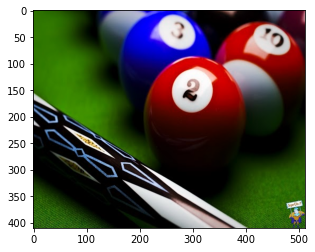

In [2]:
image = cv2.imread("labka.jpg")
plt.imshow(image)
plt.show()

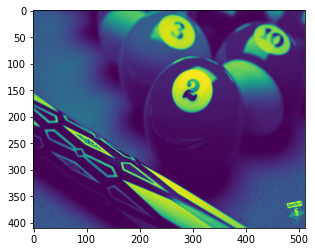

In [3]:
#Convert uploaded image to Grayscale
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
plt.show()

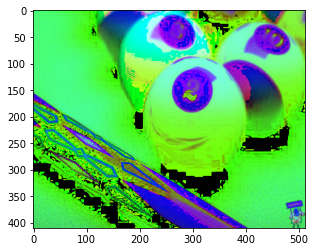

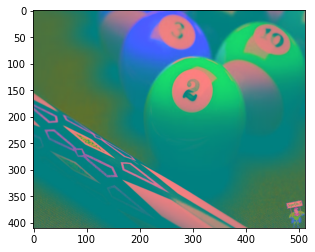

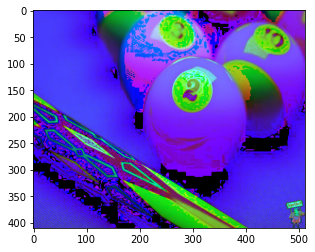

In [4]:
#Convert uploaded image to CMY, YUV and HLS color spaces
CMYimage = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
YUVimage = cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
HLSimage = cv2.cvtColor(image,cv2.COLOR_BGR2HLS)

plt.imshow(CMYimage)
plt.show()
plt.imshow(YUVimage)
plt.show()
plt.imshow(HLSimage)
plt.show()

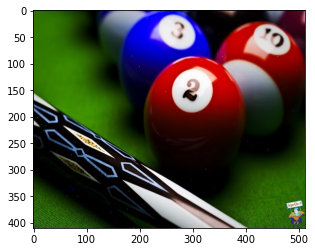

In [5]:
#Gaussian noises 
row,col,ch = image.shape
mean = 0
variance = 0.1
sigma = variance**0.5
gaussion = np.random.normal(mean,sigma,image.size)
gaussion = gaussion.reshape(row,col,ch).astype('uint8')
image_gaussion = image + gaussion

plt.imshow(image_gaussion)
plt.show()

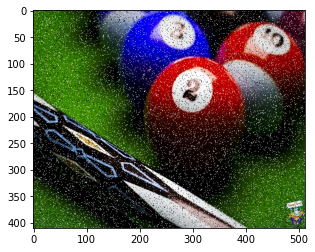

In [6]:
#"Salt & Pepper" noises
salt_pepper = np.zeros(image.shape,np.uint8)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        rdn = random.random()
        if rdn < 0.05:
            salt_pepper[i][j] = 0
        elif rdn > 1 - 0.05:
            salt_pepper[i][j] = 255
        else:
            salt_pepper[i][j] = image[i][j]

plt.imshow(salt_pepper)
plt.show()

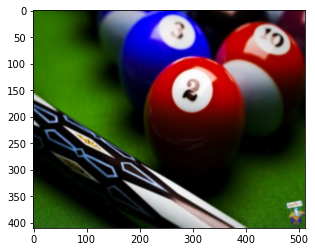

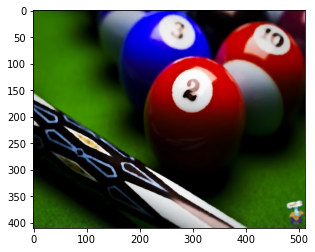

In [7]:
#Smoothe image after each noises
blur = cv2.GaussianBlur(image_gaussion,(5,5),0)
median = cv2.medianBlur(salt_pepper,5)

plt.imshow(blur)
plt.show()

plt.imshow(median)
plt.show()

In [12]:
import os
import cv2 as cv
from matplotlib import pyplot as plt

In [13]:
#Calculating histogram
image_dict = {}
original_image = cv.imread("images/8.jpg")
hsv_original = cv.cvtColor(original_image, cv.COLOR_BGR2HSV)
hist_original = cv.calcHist([hsv_original], [0, 1], None, [50, 60], [0, 180, 0, 256], accumulate=False)
cv.normalize(hist_original, hist_original, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

array([[2.4028689e-01, 3.3435870e-05, 3.3435872e-04, ..., 1.6717935e-05,
        5.0153805e-05, 3.3435870e-03],
       [0.0000000e+00, 2.0061522e-04, 1.2036914e-03, ..., 0.0000000e+00,
        0.0000000e+00, 2.6748696e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.6717935e-05, 1.8389728e-04],
       ...,
       [0.0000000e+00, 6.6871740e-05, 5.6840980e-04, ..., 0.0000000e+00,
        0.0000000e+00, 8.3589679e-05],
       [0.0000000e+00, 7.6902501e-04, 3.1931256e-03, ..., 0.0000000e+00,
        1.6717935e-05, 8.3589679e-05],
       [0.0000000e+00, 0.0000000e+00, 1.0030761e-04, ..., 6.6871740e-05,
        1.0030761e-04, 1.6717936e-04]], dtype=float32)

In [14]:
#Histogram of each image
for i in os.listdir("images/"):
    image = cv.imread("images/"+ i)
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    hist_image = cv.calcHist([hsv_image], [0, 1], None, [50, 60], [0, 180, 0, 256], accumulate=False)
    cv.normalize(hist_image, hist_image, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    compare_img = cv.compareHist(hist_original, hist_image, 3)
    if(compare_img != 0):
        image_dict[i] = compare_img
        print(str(compare_img) + " - " + i)
        

0.7204605313419283 - 63.jpg
0.7228290783407222 - 77.jpg
0.7444689504685499 - 88.jpg
0.7260905012369926 - 89.jpg
0.725881218995232 - 76.jpg
0.880867395117888 - 62.jpg
0.7476435187218657 - 74.jpg
0.7450639048482415 - 60.jpg
0.9571214027468793 - 48.jpg
0.9572965642128595 - 49.jpg
0.7403066582396725 - 61.jpg
0.7486672241293443 - 75.jpg
0.7443976336578396 - 59.jpg
0.7808629642575071 - 71.jpg
0.7045043556790952 - 65.jpg
0.706701739736468 - 64.jpg
0.7179881511108598 - 70.jpg
0.720661175347016 - 58.jpg
0.7151692722442733 - 66.jpg
0.863355732341046 - 72.jpg
0.7477272875290849 - 73.jpg
0.6582150071328664 - 67.jpg
0.043587364623937315 - 9.jpg
0.6586636731654072 - 14.jpg
0.7386990757756094 - 28.jpg
0.9527682548499153 - 29.jpg
0.6861375494558754 - 15.jpg
0.6782240132994445 - 17.jpg
0.5835696329331327 - 16.jpg
0.6500287019571344 - 12.jpg
0.6995876850329259 - 13.jpg
0.7942027969375371 - 39.jpg
0.6562870900950123 - 11.jpg
0.4352820582522422 - 10.jpg
0.9482638966371953 - 38.jpg
0.6979197493240397 - 21.

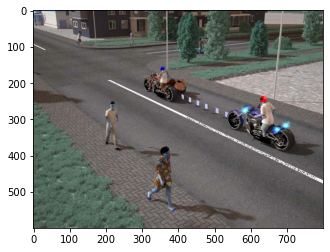

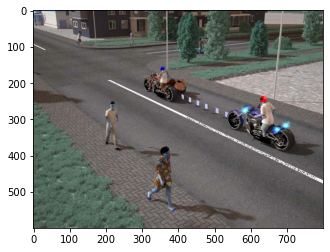

In [15]:
#Finding best mached image
best_match = cv.imread("images/" +  min(image_dict, key=image_dict.get))

plt.imshow(original_image)
plt.show()
plt.imshow(original_image)
plt.show(min(image_dict, key=image_dict.get))

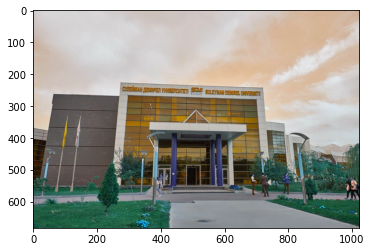

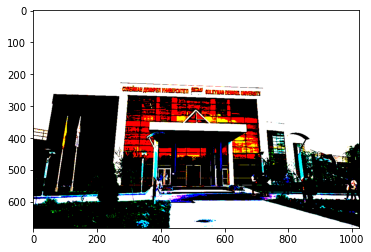

In [16]:
#Thesholding 
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lab.jpg')
retval, threshold = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(img)
plt.show()
plt.imshow(threshold)
plt.show()

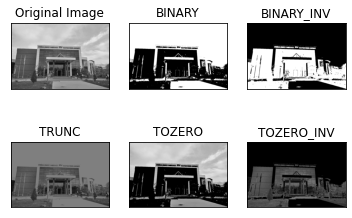

In [1]:
#Simple tresholds
import cv2 as cv
import numpy as np
import random
from matplotlib import pyplot as plt
img = cv.imread('lab.jpg',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()





In [ ]:
#Adaptive threshold
import cv2
import numpy as np
img = cv2.imread('lab.jpg')
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow('original',img)
cv2.imshow('Adaptive threshold',th)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Otsu threshold
import cv2
import numpy as np
img = cv2.imread('lab.jpg')
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
retval2,threshold2 = cv2.threshold(grayscaled,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('original',img)
cv2.imshow('Otsu threshold',threshold2)
cv2.waitKey(0)
cv2.destroyAllWindows()

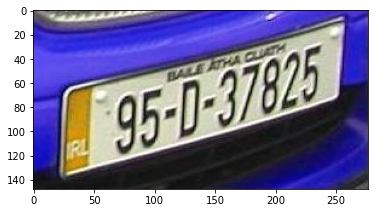

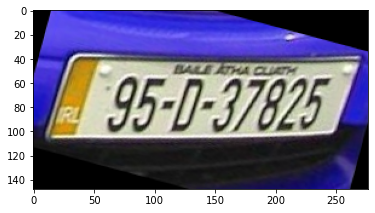

In [2]:
#Geomtric Transformation


#Try rotating uploaded image by angle -15
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('LicensePlate.jpg')
row = img.shape[1]
col = img.shape[0]

rot_mat = cv2.getRotationMatrix2D((row/2, col/2), -15, 1)
rotate_img = cv2.warpAffine(img, rot_mat, (row, col))

plt.imshow(img)
plt.show()
plt.imshow(rotate_img)
plt.show()

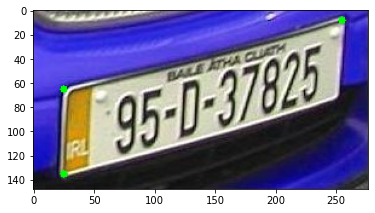

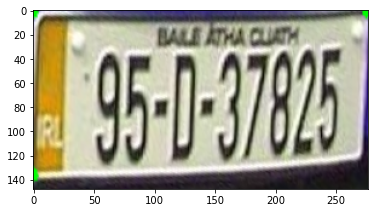

In [3]:
#Transform license plate image by using affine transformation computed from correspondences for the top left, 
#top right and bottom left corners of the license plate
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("LicensePlate.jpg")
row = img.shape[1]
col = img.shape[0]

cv2.circle(img, (25, 65), 3, (0, 255, 0), -1)
cv2.circle(img, (255, 8), 3, (0, 255, 0), -1)
cv2.circle(img, (25, 135), 3, (0, 255, 0), -1)

pts1 = np.float32([[25, 65], [255, 8], [25, 135]])
pts2 = np.float32([[0, 0], [275, 0], [0, 135]])

matrix = cv2.getAffineTransform(pts1, pts2)
affine_img = cv2.warpAffine(img, matrix, (row, col))

plt.imshow(img)
plt.show()
plt.imshow(affine_img)
plt.show()

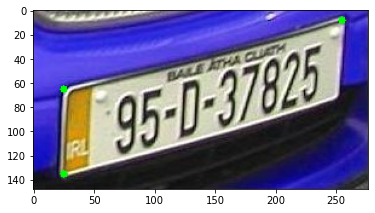

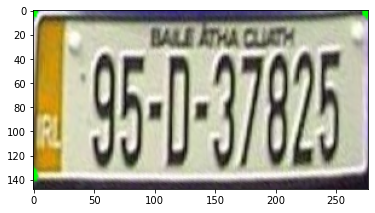

In [4]:
#Transform license plate image by using perspective transformation computed from correspondences for the top left, 
#top right and bottom left corners of the license plate
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("LicensePlate.jpg")
row = img.shape[1]
col = img.shape[0]


cv2.circle(img, (25, 65), 3, (0, 255, 0), -1)
cv2.circle(img, (255, 8), 3, (0, 255, 0), -1)
cv2.circle(img, (25, 135), 3, (0, 255, 0), -1)


pts1 = np.float32([[25, 65], [255, 8], [25, 135], [251, 73]])
pts2 = np.float32([[0, 0], [275, 0], [0, 135], [275, 135]])

matrix = cv2.getPerspectiveTransform(pts1, pts2)
pers_img = cv2.warpPerspective(img, matrix, (row, col))

plt.imshow(img)
plt.show()
plt.imshow(pers_img)
plt.show()



In [ ]:
#transformations with different interpolation methods (Nearest neighbour, Bilinear, Bicubic)
import cv2

img = cv2.imread("LicensePlate.jpg")

near_img = cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_NEAREST)
bil_img = cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_LINEAR)
bic_img = cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)

cv2.imshow('Original', img)
cv2.imshow('Nearest neighbour', near_img)
cv2.imshow('Bilinear', bil_img)
cv2.imshow('Bicubic', bic_img)

cv2.waitKey()